<a href="https://colab.research.google.com/github/yujiimt/time_series/blob/master/SARIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [0]:
import requests
import io
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

url = 'https://www.analyticsvidhya.com/wp-content/uploads/2016/02/AirPassengers.csv'
stream = requests.get(url).content
content = pd.read_csv(io.StringIO(stream.decode('utf-8')))

df_content = content.copy()

df_content['Month'] = pd.to_datetime(df_content['Month'],
                                     infer_datetime_format = True)
y = pd.Series(df_content['#Passengers'].values, index = df_content['Month'])
y = y.astype('f')

y120 = y[:120]

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


<BarContainer object of 120 artists>

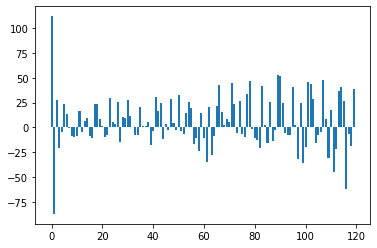

In [30]:
p, d, q, sp, sd, sq = 2, 1, 2, 1, 1, 1
seasonal = 12

#SARIMAX(p=2, d=1, q=2; P=1, D=1, Q=1, s=12) モデルのあてはめ

result = SARIMAX(
    y120, order = (p, d, q),
    seasonra_order = (sp, sd, sq, seasonal),
    enforce_stationarity = False,
    emfore_incertibility = False, 
).fit()

#残差の抽出
res = result.resid

#残差の出力
plt.bar(range(len(res)), res)

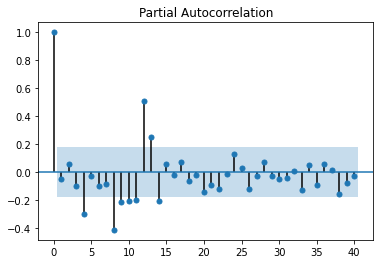

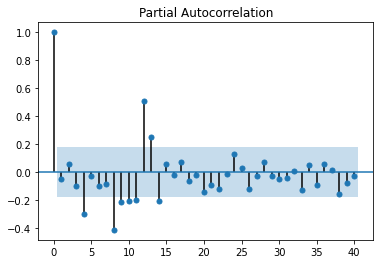

In [28]:
from statsmodels.graphics import tsaplots


tsaplots.plot_pacf(res, lags = 40)

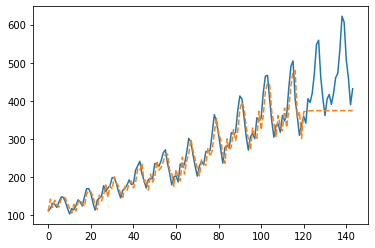

In [29]:

plt.plot(y.values, label = 'observation')

plt.plot(np.hstack([y120[0],
                    result.fittedvalues[1:],
                    result.forecast(24)]),
         '--', label = 'forecast')

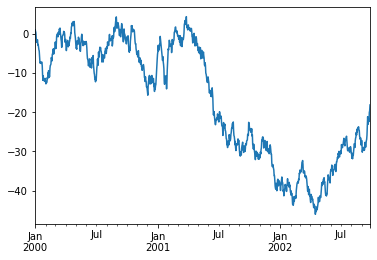

In [34]:
y = pd.Series(np.random.randn(1000),
              index = pd.date_range('2000-1-1', periods = 1000))

y = y.cumsum()

y.plot()

In [35]:
from statsmodels.tsa import stattools

ctt = stattools.adfuller(y, regression = 'ctt')
ct = stattools.adfuller(y, regression = 'ct')
c = stattools.adfuller(y, regression = 'c')
nc = stattools.adfuller(y, regression = 'nc')


print('ctt')
print(ctt)
print('ct')
print(ct)
print('c')
print(c)
print('nc')
print(nc)

ctt
(-0.9005062035422321, 0.9903269077983965, 0, 999, {'1%': -4.382766025596549, '5%': -3.8383142452686947, '10%': -3.5569286306152224}, 2792.3987049670527)
ct
(-1.1454949617834813, 0.9210877502503675, 0, 999, {'1%': -3.967860781661831, '5%': -3.4148938944043334, '10%': -3.1296421434972537}, 2796.0100319744197)
c
(-1.4247986131985702, 0.5703313165699726, 0, 999, {'1%': -3.4369127451400474, '5%': -2.864437475834273, '10%': -2.568312754566378}, 2795.099513628285)
nc
(-0.4714080066048904, 0.5078376306892313, 0, 999, {'1%': -2.5679816723029334, '5%': -1.9412722092921209, '10%': -1.6165568281300424}, 2794.118546940941)


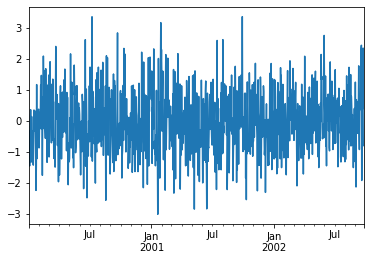

In [36]:
y_diff = y.diff().dropna()
y_diff.plot()

In [38]:
ctt = stattools.adfuller(y_diff, regression='ctt')
ct = stattools.adfuller(y_diff, regression='ct')
c = stattools.adfuller(y_diff, regression='c')
nc = stattools.adfuller(y_diff, regression='nc')


print('ctt')
print(ctt)
print('ct')
print(ct)
print('c')
print(c)
print('nc')
print(nc)

ctt
(-31.228686157169182, 0.0, 0, 998, {'1%': -4.382777721611994, '5%': -3.8383201941769736, '10%': -3.556932312045306}, 2789.42903960912)
ct
(-31.153907846585877, 0.0, 0, 998, {'1%': -3.9678699195021783, '5%': -3.414898316296852, '10%': -3.129644744825171}, 2794.345064466489)
c
(-31.14277537082304, 0.0, 0, 998, {'1%': -3.4369193380671, '5%': -2.864440383452517, '10%': -2.56831430323573}, 2792.426870766143)
nc
(-31.14777640365963, 0.0, 0, 998, {'1%': -2.5679839221127625, '5%': -1.9412724853659513, '10%': -1.6165565671073312}, 2790.466477559062)
